# Titanic Data 실습

## STEP 01) 데이터 확인, 전처리

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


titanic_df = pd.read_csv('./TEST/titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


* PassengerId : 탑승자 데이터 일련번호
* Survived : 생존 여부 (0은 사망 1은 생존)
* Pclass : 티켓 선실 등급 (1: 일등석 / 2:이등석 / 3:삼등석 )
* SibSp : 같이 탑승한 형제자매,배우자 인원수
* Parch : 같이 탑승한 부모님, 어린이 인원수
* Cabin : 선실 번호
* Embarked : 중간 정착 항구

In [18]:
print('\n ### train 데이터 정보 ###  \n')
print(titanic_df.info())


 ### train 데이터 정보 ###  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


### STEP 01_데이터 전처리 1
#### Age, Cabin, Embarked만 not-null개수가 891개가 아니므로 NULL값을 가지고 있음을 알 수있음!!
#### NUll값을 가지기 때문에 데이터 전처리 필요!! => fillna()사용해서 NULL값을 평균 또는 고정 값으로 바꿔줄것!

In [19]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터 세트 Null 값 갯수 ',titanic_df.isnull().sum().sum())

데이터 세트 Null 값 갯수  0


### STEP 01_데이터 전처리 2
#### Cabin의 경우 알파벳 한개로 묶어주는 것이 좋을 듯

In [20]:
print(' Sex 값 분포 :\n',titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 :\n',titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 :\n',titanic_df['Embarked'].value_counts())

 Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 :
 N              687
B96 B98          4
C23 C25 C27      4
G6               4
D                3
              ... 
C32              1
F E69            1
A20              1
B78              1
B42              1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [21]:
# Cabin 앞 글자 1개 추출
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(5))

0    N
1    C
2    N
3    C
4    N
Name: Cabin, dtype: object


## STEP 02) 데이터 탐색

### STEP 02_승객 성별과 생존 확률 
사고가 날 경우 여성,아이들,노약자가 우선 구조 대상  
남자보다 여자가 더 많이 구조되지 않았을까...?? 확인해보자

In [6]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

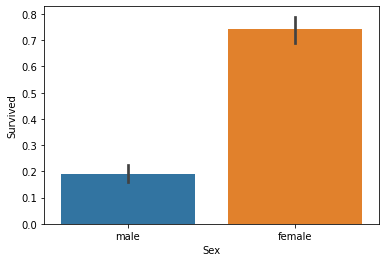

In [7]:
sns.barplot(x='Sex', y ='Survived', data=titanic_df)

### STEP 02_"객실 등급+성별"과 생존 확률
hue파라미터 이용!!  
 
아무래도 부자가 더 많이 구조되지 않았을까....??ㅠㅠ 확인해보자

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

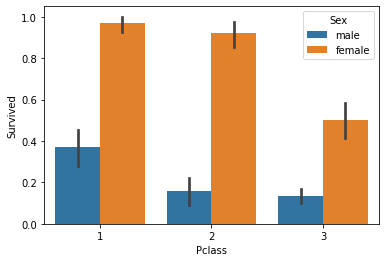

In [8]:
# 아래와 같은 객실등급별 그래프..
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

### STEP 02_"나이+성별"과 생존 확률  
Age의 경우 종류가 너무 많아!!  
따라서 0-5는 Baby, 6-12는 Child, 13-18은 Teen, 19-25는 Student, 26-35는 Young Adult(YA), 36-60은 Adult, 61이상은 Elderly로 분류하자

In [24]:
# 입력 age에 따라 구분값을 반환하는 함수 설정. DataFrame의 apply lambda식에 사용. 
def get_category(age):
    cat = ''
    if age <= -1 : cat = 'Unknow'
    elif age <=5 : cat = 'Baby'
    elif age <=12 : cat = 'Child'
    elif age <= 18 : cat = 'Teenager'
    elif age <= 25 : cat = 'Student'
    elif age <= 35 : cat = 'Young Adult'
    elif age <= 60 : cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

<AxesSubplot:xlabel='Age_cat', ylabel='Survived'>

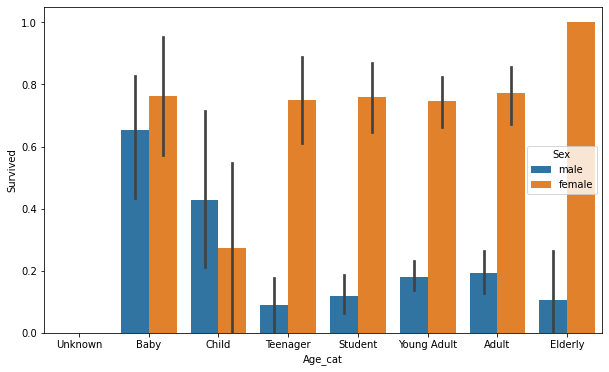

In [25]:
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))

plt.figure(figsize=(10,6))
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']
sns.barplot(x='Age_cat', y = 'Survived', hue='Sex', data=titanic_df, order=group_names)

In [26]:
titanic_df.drop(['Age_cat'],axis=1,inplace=True)

## STEP 03) 데이터 전처리 => ScikitLearn하기 위해 문자를 숫자형으로 변환해주자!
#### 레이블인코더 클래스 사용할꺼임!!

In [28]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


## STEP 04) 데이터 전처리 => 필요없는 속성 제거  
PassengerId, Name, Ticket

In [29]:
titanic_df.drop(['PassengerId','Name','Ticket'], axis=1,inplace=True)

In [30]:
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.000000,1,0,7.2500,7,3
1,1,1,0,38.000000,1,0,71.2833,2,0
2,1,3,0,26.000000,0,0,7.9250,7,3
3,1,1,0,35.000000,1,0,53.1000,2,3
4,0,3,1,35.000000,0,0,8.0500,7,3
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,7,3
887,1,1,0,19.000000,0,0,30.0000,1,3
888,0,3,0,29.699118,1,2,23.4500,7,3
889,1,1,1,26.000000,0,0,30.0000,2,0


## STEP 05) 

In [ ]:
# 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출. 
titanic_df = pd.read_csv(~~~)
y_titanic_df = ~~~
X_titanic_df= ~~~

X_titanic_df = ~~~

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=11)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.~~~
dt_pred = dt_clf.~~~
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.~~~
rf_pred = rf_clf.~~~
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))


In [ ]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한  리스트 객체 생성.
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold 교차 검증 수행. 
    for iter_count , (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        # Classifier 학습, 예측, 정확도 계산 
        clf.fit(X_train, y_train) 
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))     
    
    # 5개 fold에서의 평균 정확도 계산. 
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score)) 
# exec_kfold 호출
exec_kfold(dt_clf , folds=5) 


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(~~~)
for iter_count,accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(~~~))

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = ~~~

grid_dclf = GridSearchCV(~~~)
grid_dclf.~~~

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.~~~)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.~~~))
best_dclf = grid_dclf.~~~~

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
dpredictions = best_dclf.~~~
accuracy = accuracy_score(y_test , dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))
